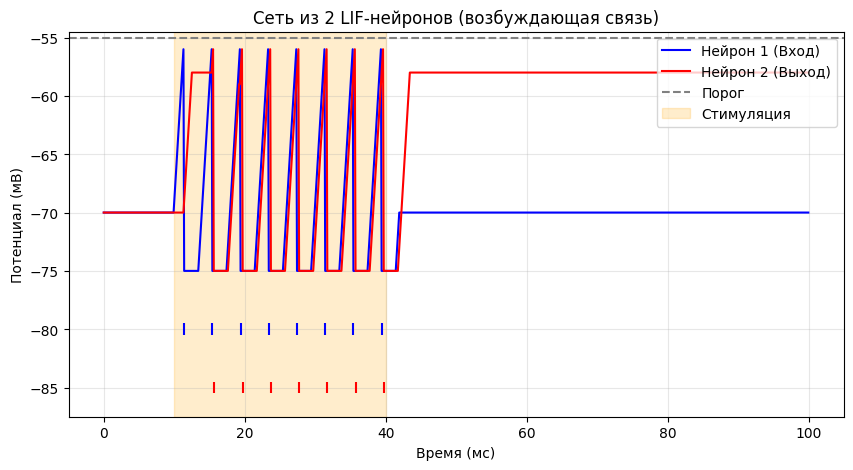

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dt, T = 0.1, 100
time = np.arange(0, T, dt)
V_rest, V_thresh, V_reset, tau_m = -70, -55, -75, 20
w_syn, tau_s = 15, 5
I_amp, I_start, I_end = 20, 10, 40

V1, V2 = np.full(len(time), V_rest), np.full(len(time), V_rest)
spike1, spike2 = np.zeros(len(time)), np.zeros(len(time))
I_syn = np.zeros(len(time))
ref1, ref2 = 0, 0
ref_period = int(2 / dt)

for i in range(1, len(time)):
    I_in = I_amp if I_start <= time[i] <= I_end else 0
    
    if ref1 > 0:
        V1[i], ref1 = V_reset, ref1 - 1
    else:
        V1[i] = V1[i-1] + (-(V1[i-1] - V_rest) + I_in) * dt / tau_m
        if V1[i] >= V_thresh:
            V1[i], ref1, spike1[i] = V_reset, ref_period, 1
    
    I_syn[i] = I_syn[i-1] * np.exp(-dt / tau_s)
    if spike1[i]: I_syn[i] += w_syn
    
    if ref2 > 0:
        V2[i], ref2 = V_reset, ref2 - 1
    else:
        V2[i] = V2[i-1] + (-(V2[i-1] - V_rest) + I_syn[i]) * dt / tau_m
        if V2[i] >= V_thresh:
            V2[i], ref2, spike2[i] = V_reset, ref_period, 1

plt.figure(figsize=(10, 5))
plt.plot(time, V1, 'b', label='Нейрон 1 (Вход)')
plt.plot(time, V2, 'r', label='Нейрон 2 (Выход)')
plt.eventplot([time[spike1==1], time[spike2==1]], colors=['b', 'r'], lineoffsets=[-80, -85])
plt.axhline(V_thresh, ls='--', color='gray', label='Порог')
plt.axvspan(I_start, I_end, alpha=0.2, color='orange', label='Стимуляция')
plt.xlabel('Время (мс)'); plt.ylabel('Потенциал (мВ)')
plt.title('Сеть из 2 LIF-нейронов (возбуждающая связь)')
plt.legend(loc='upper right'); plt.grid(True, alpha=0.3)
plt.show()